<a href="https://colab.research.google.com/github/zainamri/PengDasTask/blob/main/seattle_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#CONNECT TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
dfw = pd.read_csv("/content/drive/MyDrive/weather/seattle-weather.csv")

dataset tersebut berasal dari kaggle https://www.kaggle.com/datasets/ananthr1/weather-prediction/data

In [53]:
dfw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


*   date : Tanggal terdata dari 1 Jan 2012 - 31 Des 2015
*   precipitation : curah hujan/ pengendapan (Segala bentuk air yang jatuh ke permukaan tanah dan badan air terbuka seperti hujan, hujan es, salju, hujan es, atau)
*   temp_max : suhu maksimum
*   temp_min : suhu minimum
*   wind : kecepatan angin
*   weather : keluaran cuaca (sun, rain, drizzle, snow, & fog)



In [54]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


memberikan info tentang data yang ada, memiliki 6 columns atau atribut, dengan jumlah data 1461, type data ada 4 float(precipitation, temp_max, temp_min, win) dan 2 object (date dan weather)

In [55]:
import matplotlib.pyplot as plt

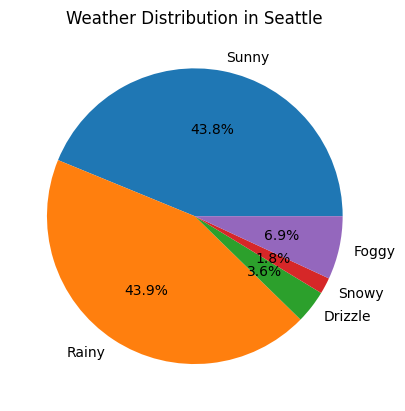

In [56]:
# Hitung jumlah kejadian setiap kategori cuaca
sun_count = dfw[dfw['weather'] == 'sun'].shape[0]
rain_count = dfw[dfw['weather'] == 'rain'].shape[0]
drizzle_count = dfw[dfw['weather'] == 'drizzle'].shape[0]
snow_count = dfw[dfw['weather'] == 'snow'].shape[0]
fog_count = dfw[dfw['weather'] == 'fog'].shape[0]

# Buat label dan jumlah kategori cuaca
labels = ['Sunny', 'Rainy', 'Drizzle', 'Snowy', 'Foggy']
counts = [sun_count, rain_count, drizzle_count, snow_count, fog_count]

# Visualisasi menggunakan pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Tambahkan judul
plt.title('Weather Distribution in Seattle')

# Tampilkan plot
plt.show()

* Pie chart memberikan gambaran yang jelas mengenai proporsi kejadian setiap kategori cuaca secara visual.
* Dapat disimpulkan bahwa cuaca yang paling dominate di Seattle adalah cerah/sunny dan hujan/rainy, masing-masing sekitar 43.8% dan 43.9%. Ini menunjukkan sebagian besar hari di Seattle dicirikan dengan cuaca cerah atau hujan.
* Kategori cuaca lainnya seperti drizzle, salju, dan kabut jauh lebih jarang, masing-masing hanya sekitar 3.6%, 1.8%, dan 6.9%. Ini mengindikasikan bahwa cuaca jenis ini relatif jarang terjadi di Seattle.


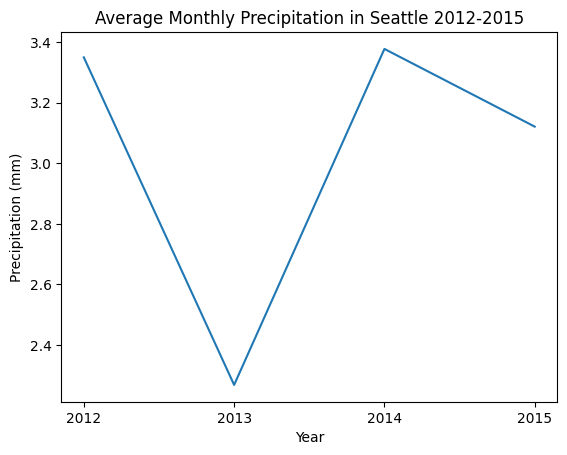

In [57]:
df_group = dfw.groupby(dfw['date'].str[:4])['precipitation'].mean()

plt.plot(df_group)
plt.title('Average Monthly Precipitation in Seattle 2012-2015')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

plt.show()

*   Line chart ini di gunakan menampilkan rata-rata curah hujan bulanan di Seattle berdasarkan tahun, mulai dari 2012 hingga 2015.
*   Dari grafik dapat dilihat pola dan tren curah hujan(precipitation) yang terjadi setiap tahunnya. Dari tahun 2012 ke 2013 terjadi penurunan rata-rata curah hujan bulanan yang cukup signifikan. Lalu pada tahun 2014 terlihat ada peningkatan kembali, dan sekitar ke tahun 2015 terjadi sedikit penurunan lagi.
*   Secara umum pola tersebut menunjukkan fluktuasi rata-rata curah hujan dari tahun ke tahun, dengan penurunan cukup tajam pada 2013 dan tingkat curah hujan kembali meningkat pada 2014.



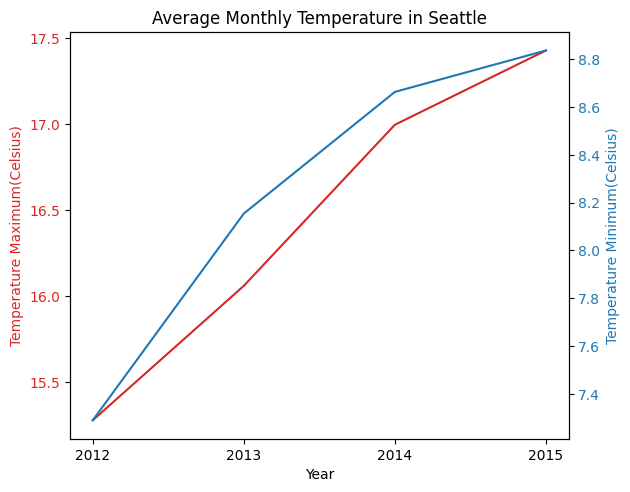

In [58]:
# Group data berdasarkan tahun
temp_max_group = dfw.groupby(dfw['date'].str[:4])['temp_max'].mean()
temp_min_group = dfw.groupby(dfw['date'].str[:4])['temp_min'].mean()

# Buat plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Maximum(Celsius)', color=color)
ax1.plot(temp_max_group, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature Minimum(Celsius)', color=color)
ax2.plot(temp_min_group, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Monthly Temperature in Seattle')

plt.show()

*   Line chart efektif untuk melihat hubungan antara suhu dan waktu (tahun), serta perbandingan antar suhu maksimum dan minimum. Perbedaan warnanya memudahkan dalam membandingkan pola perubahan suhu maksimum dan minimum.
*   Secara umum terlihat kenaikan rata-rata suhu maksimum dan minimum dari tahun ke tahun. Suhu maksimum dan minimum pada tahun 2015 merupakan yang tertinggi dibandingkan tahun sebelumnya. Dan selisih antara suhu maksimum dan minimum cenderung semakin kecil setiap tahunnya, menandakan bahwa perubahan iklim menuju suhu yang lebih hangat.



Kesimpulan

---



* Visualisasi 3 atribut utama dataset cuaca Seattle yaitu distribusi cuaca, curah hujan bulanan, dan suhu rata-rata bulanan dapat memberikan wawasan yang berharga tentang pola cuaca di kota Seattle.
  1. Distribusi cuaca menunjukkan cuaca terjadi paling sering,
  2. curah hujan bulanan memaparkan pola musim hujan dan kemarau,
  3. suhu rata-rata menggambarkan variasi suhu setiap bulan.
* Visualisasi data memungkinkan analisis lebih mendalam dari data mentah dan menampakkan trend serta perbandingan yang bermanfaat untuk penelitian perubahan iklim.
* Proyek ini mencontohkan manfaat visualisasi dalam menghasilkan pemahaman dari sekumpulan data.
* Secara keseluruhan, visualisasi berperan penting dalam memahami pola dan fenomena yang terjadi pada dataset cuaca kota Seattle.